### 회귀
* 독립변수가 종속변수에 영향을 미치는지 알아보고자 할 때 사용
* 연속형 변수들에 대해 두 변수 사이의 적합도를 측정
* 단순회귀
    - 하나의 종속변수와 하나의 독립변수 사이의 관계 분석
* 다중회귀
    - 하나의 종속변수와 여러 독립변수 사이의 관계 분석

<img src="../images/회귀.png" width="700" />

### 회귀 평가지표
* MSE(Mean Squared Error)(평균 제곱 오차)
    - 예측값과 실제값의 차이에 대한 제곱에 대하여 평균을 낸 값
    - 회귀 문제에서 가장 많이 사용하는 성능 지표
    - 모델을 평가하는 평가 지표로 오차를 나타내는 식이므로 수치가 적을 수록 좋은 모델
    - 다른 모델과 비교해야만 성능이 좋은지 알 수 있다.
* RMSE(Root Mean Squared Error)
    - 0에 가까울수록 좋은 모델
    - MSE씌 ROOT를 씌운 값
* MAE(Mean Absolute Error, 평균 절대 오차)
    - 실제값 대비 예측값의 오차를 나타내는 것으로 값이 낮을 수록 좋다
    - 예측값과 실제값의 차이에 대한 절대값에 대하여 평균을 낸 값
* MAPE(Mean Absolute Percentage Error, 평균 절대 비율 오차)
    - 실제값 대비 예측차이가 얼마나 있는지를 비율(%)로 측정
    - 퍼센트값을 가지며 0에 가까울수록 회귀모형의 성능이 좋다고 해석
* r2(결정계수)
    - 0~1 사이의 값을 표현해 주며 r2의 값이 높을수록 좋다
    - 예측 모델과 실제 모델이 얼마나 강한 상관관계를 가지고 있는지 강한 상관관계를 가지고 있는지

* 타겟 데이터
    - 1978년 보스턴 주택 가격
    - 506개 타운의 주택 가격 중앙값(단위 1,000달러)
* 특징 데이터
    - CRIM : 범죄율
    - ZM : 25,000평방 피트 당 주거용 토지의 비율
    - INDUS : 비소매상업지역 면적 비율
    - CHAS : 찰스강의 경계에 위치한 경우는 1, 아니면 0(통로가 하천을 향하면1, 아니면 0)
    - NOX : 일산화질소 농도(천만분의 1)
    - RM : 주택당 방수
    - AGE : 1940년 이전에 건축된 주택의 비율
    - DIS : 5개 주요 고용센터까지의 가중거리
    - RAD : 고속도로 접근성 지수
    - TAX : 재산세율
    - PTRATIO : 학생/교사 비율
    - B ; 인구 중 흑인 거주 비율
    - LSTAT : 인구 중 하위 계층 비율
    - MEDV : 본인 소유의 주택가격(중앙값) (단위: $1,000)

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('../data_set/6.회귀/HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,0.00,36.2


In [5]:
from sklearn.model_selection import train_test_split

y = df['MEDV']
X = df.drop(['MEDV'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [6]:
from sklearn.neighbors import KNeighborsRegressor

kn = KNeighborsRegressor()
kn.fit(X_train, y_train)

KNeighborsRegressor()

In [24]:
pred = kn.predict(X_test)
pred

array([24.62, 18.38, 23.88, 27.44, 23.86, 24.2 , 23.86, 24.6 , 24.86,
       24.7 , 18.76, 19.3 , 14.82, 20.82, 20.78, 23.86, 22.  , 19.72,
       42.36, 20.66, 19.3 , 31.48, 20.26, 30.02, 18.76, 22.92, 22.42,
        8.94, 15.2 , 31.86, 10.6 , 23.42, 23.22, 22.  , 19.6 , 20.12,
       23.98, 26.64, 13.36, 23.24, 22.6 , 17.94, 35.78, 18.5 , 23.26,
       27.9 , 10.06, 32.38,  9.32, 21.64, 24.48, 32.84, 39.08, 20.9 ,
       25.76, 14.3 ,  9.3 , 17.94, 23.82, 11.58, 23.08, 16.32, 14.8 ,
       28.4 , 16.98, 24.12, 16.58, 23.96, 27.98, 16.32, 23.7 , 24.14,
        8.94, 33.18, 18.  , 19.26, 31.34, 21.82, 17.18, 19.14, 26.78,
        9.6 , 27.74, 28.62, 23.32, 34.04, 23.86, 11.36, 24.34, 27.8 ,
       33.8 , 27.74, 35.8 , 19.86, 11.12, 21.62, 22.74, 24.94, 26.5 ,
       23.06, 13.8 , 36.94, 24.64, 20.18, 27.52, 19.8 , 19.76,  9.68,
       29.42, 26.1 , 22.94, 18.  , 17.22, 27.8 , 10.58, 18.32, 22.4 ,
       24.1 , 10.58, 10.6 , 19.98, 24.9 , 13.36, 29.4 , 24.12, 17.94,
       24.12, 41.6 ,

In [15]:
y_test

297    20.3
364    21.9
98     43.8
126    15.7
218    21.5
       ... 
185    29.6
16     23.1
501    22.4
88     23.6
424    11.7
Name: MEDV, Length: 152, dtype: float64

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print("mse : ", mse)
print("r2  :" , r2)
print("score : ", kn.score(X_train, y_train))
print("score : ", kn.score(X_test, y_test))

mse :  45.60683421052631
r2  : 0.3492162260007803
score :  0.6787751821950372
score :  0.3492162260007803


In [17]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [20]:
pred = rfr.predict(X_test)

mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print("mse : ", mse)
print("r2  :" , r2)
print("score : ", rfr.score(X_train, y_train))
print("score : ", rfr.score(X_test, y_test))

mse :  17.824241763157897
r2  : 0.7456581338279972
score :  0.9743530151016075
score :  0.7456581338279972


### 자전거 수요 예측
* 자전거 수요를 파악하여 효율적으로 자전거 대여수를 예측하고자 한다
* 월, 일, 시 별로 언제 자전거를 많이 대여하는지를 파악한다
>
* 컬럼
    - datetime : 대여 날짜
    - season : 1(봄), 2(여름), 3(가을), 4(겨울)
    - holiday : 1(토,일 주말을 제외한 국경일 등의 휴일), 0(휴일이 아닌 날)
    - workingday : 1(토, 일 주말 및 휴일이 아닌 주중), 0(주말 및 휴일)
    - weather : 1(맑음), 2(흐림), 3(가벼운 눈, 비), 4(심한 눈, 비)
    - temp : 온도(섭씨)
    - atemp : 체감온도(섭씨)
    - humidity : 습도
    - windspeed : 풍속
    - casual : 비등록 대여 횟수
    - registered : 등록 대여 횟수
    - count : 총 대여 횟수

In [27]:
df = pd.read_csv('../data_set/6.회귀/data.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [29]:
df['datetime'] = df['datetime'].apply(pd.to_datetime)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [33]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

In [34]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [37]:
d = df.groupby('hour').agg({"count":sum})
d

,count
hour,
0,25088
1,15372
2,10259
3,5091
4,2832
5,8935
6,34698
7,96968
8,165060


In [38]:
d = df.groupby('hour').agg({"count":sum}).reset_index()
d

,hour,count
0,0,25088
1,1,15372
2,2,10259
3,3,5091
4,4,2832
5,5,8935
6,6,34698
7,7,96968
8,8,165060
9,9,100910


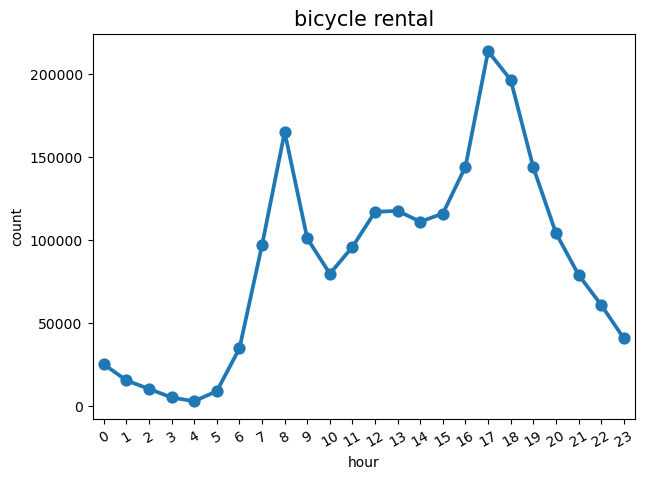

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
sns_result = sns.pointplot(data=d, x="hour", y="count")

plt.xticks(rotation=30)
plt.title("bicycle rental", fontsize=15, color="black")
plt.show()

In [41]:
d = df.groupby(['hour', 'workingday']).agg({"count":sum}).reset_index()
d.head()

,hour,workingday,count
0,0,0,13701
1,0,1,11387
2,1,0,10427
3,1,1,4945
4,2,0,7686


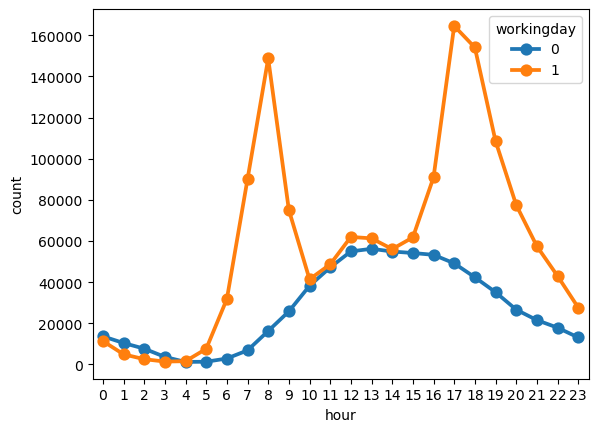

In [43]:
sns.pointplot(data=d, x="hour", y="count", hue="workingday")
plt.show()

In [44]:
d = df.groupby(['hour', 'month']).agg({"count":sum}).reset_index()
d.head()

,hour,month,count
0,0,1,852
1,0,2,1096
2,0,3,1249
3,0,4,1480
4,0,5,2441


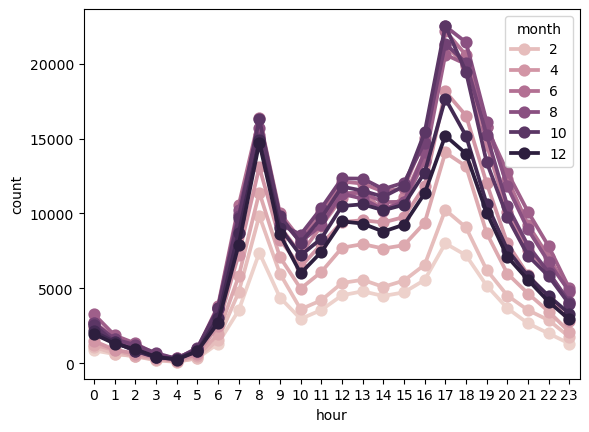

In [45]:
sns.pointplot(data=d, x="hour", y="count", hue="month")
plt.show()

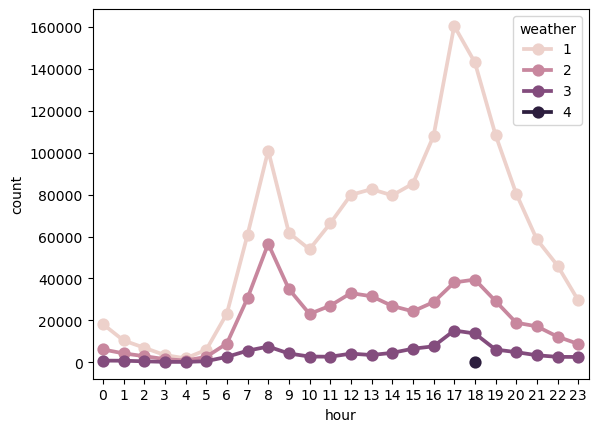

In [46]:
d = df.groupby(['hour', 'weather']).agg({"count":sum}).reset_index()
d.head()
sns.pointplot(data=d, x="hour", y="count", hue="weather")
plt.show()

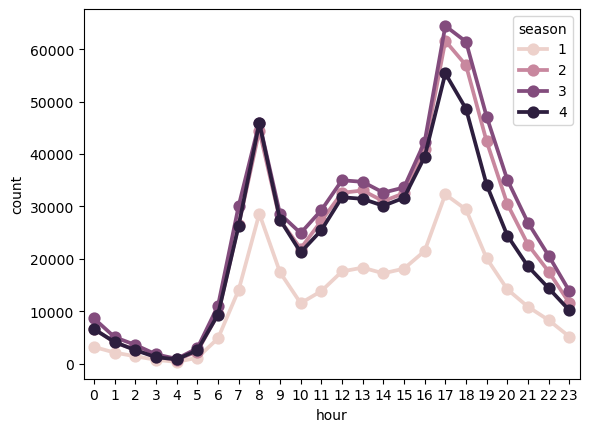

In [47]:
d = df.groupby(['hour', 'season']).agg({"count":sum}).reset_index()
d.head()
sns.pointplot(data=d, x="hour", y="count", hue="season")
plt.show()

In [48]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour'],
      dtype='object')

In [49]:
f = ['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour']
l = 'count'
X, y = df[f], df[l]

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [51]:
from sklearn.ensemble import RandomForestRegressor
frf = RandomForestRegressor()
rfr.fit(X_train, y_train)
print("train : ", rfr.score(X_train, y_train))
print("test  : ", rfr.score(X_test, y_test))

train :  0.9920986081923214
test  :  0.9349266360047442


In [52]:
from sklearn.model_selection import GridSearchCV

params = {
    "n_estimators" : range(5, 100, 10),   # 트리 개수(알고리즘)
    "max_depth" : range(4, 11, 2),        # 트리의 최대 깊이 
    "min_samples_split" : range(4, 21, 4) # 립노드 조건 샘플 수 
}

rfr = RandomForestRegressor()
grid_cv = GridSearchCV(rfr, param_grid=params, cv=3, n_jobs=-1)

grid_cv.fit(X_train, y_train)

print("최적의 파라미터 : ", grid_cv.best_params_)
print("train : ", grid_cv.score(X_train, y_train))
print("test  : ", grid_cv.score(X_test, y_test))

최적의 파라미터 :  {'max_depth': 10, 'min_samples_split': 4, 'n_estimators': 85}
train :  0.956582148303666
test  :  0.9209852403557801


In [53]:
X

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,2012,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,2012,12,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,2012,12,19,22


In [55]:
re = grid_cv.predict([[1,	0,	0,	1,	9.84,	14.395,	81,	0.0000,	2011,	1,	1,	0]])
int (re[0])

26

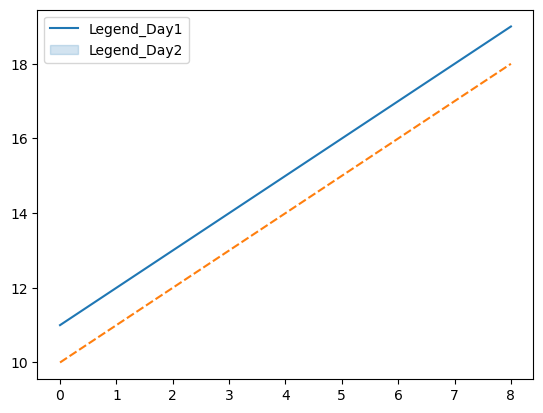

In [56]:
# 예제 : 두 값을 비교하기 위함
df_result = pd.DataFrame({"y_test ": [11,12,13,14,15,16,17,18,19],
                    "line_test" : [10,11,12,13,14,15,16,17,18]})

sns.lineplot(data = df_result)
plt.legend(labels=["Legend_Day1","Legend_Day2"])
# 실제 정답과 예측 정답 두가지를 넣고 lineplot를 이용하여 그리면 된다

In [57]:
grid_cv.predict(X_test)

array([150.01567911, 394.85831825, 130.23317825, ...,  86.61621515,
       269.7887433 ,   4.36885353])

In [58]:
y_test

1799    105
8698    397
2088    132
5251    121
8776     23
       ... 
4883     58
4824     17
1054     78
6487    205
7075      5
Name: count, Length: 3266, dtype: int64

In [63]:
range_start = 0
range_end = 30
line_test = grid_cv.predict(X_test)

y_test_reset = y_test[range_start : range_end].reset_index()
y_test_reset["pred_test"] = line_test[range_start : range_end]
y_test_reset["pred_test"] = y_test_reset["pred_test"].apply(int)
y_test_reset

,index,count,pred_test
0,1799,105,150
1,8698,397,394
2,2088,132,130
3,5251,121,121
4,8776,23,24
5,2684,296,374
6,893,102,98
7,4999,246,210
8,121,95,106
9,9351,57,69


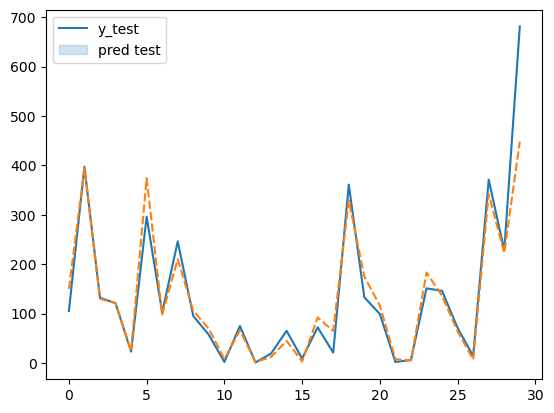

In [64]:
sns.lineplot(data=y_test_reset[['count', 'pred_test']])
plt.legend(labels=['y_test', 'pred test'])